In [5]:
from pathlib import Path
import subprocess
import time
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def download_icloud(path):
    
    filename = path.name.split('.icloud')[0]
    filename = filename[1:]
    command = f'/usr/bin/brctl download {path}'
    subprocess.run(command.split())
    while not (path.parents[0]/filename).exists():
        time.sleep(0.25)

    return path.parents[0]/filename

def evict_icloud(path):
    
    filename = path.name
    filename = '.'+filename+'.icloud'
    command = f'/usr/bin/brctl evict {path}'
    subprocess.run(command.split())
    while (path.exists()):
        time.sleep(0.25)
    
    return path.parents[0]/filename
        

def collect_max_data():
    
    max_data = np.zeros((11, 11, 141))
    
    file_repository = Path.home()/'iCloud'/'jugaad_data'/'beamforming'/'221209_beamforming_characterization'
    file_list = list(file_repository.glob('*.h5.icloud'))
    
    for i, file in enumerate(file_list):
        downloaded_file = download_icloud(file)
        file_name = downloaded_file.name
        #print(file_name)
        r_ind = int(file_name.split('z')[0].split('r')[-1])//5
        z_ind = int(file_name.split('z')[-1].split('.h5')[0])//5
        h5file = h5py.File(downloaded_file, 'r')
        max_data[r_ind, z_ind, :] = h5file['max_data']['data'][:]
        h5file.close()
        evicted_file = evict_icloud(downloaded_file)
        
        if (i % 5) == 4:
            print(f'Progress = {round(100*(i+1)/len(file_list),1)}%')
        
    return max_data
        

def calculate_total_signal_power():
    
    total_power = np.zeros((11,11,141))
    file_repository = Path.home()/'iCloud'/'jugaad_data'/'beamforming'/'221209_beamforming_characterization'
    file_list = list(file_repository.glob('*.h5.icloud'))
    
    for i, file in enumerate(file_list):
        downloaded_file = download_icloud(file)
        file_name = downloaded_file.name

        r_ind = int(file_name.split('z')[0].split('r')[-1])//5
        z_ind = int(file_name.split('z')[-1].split('.h5')[0])//5
        h5file = h5py.File(downloaded_file, 'r')
        array_data = h5file['array_data']['data'][:, :, 1, 0]

        temp = abs((array_data * np.exp(-1j * np.angle(array_data))).sum(axis=0))
        total_power[r_ind, z_ind, :] = temp      
        h5file.close()
        evicted_file = evict_icloud(downloaded_file)
        
        if (i % 5) == 4:
            print(f'Progress = {round(100*(i+1)/len(file_list),1)}%')
            
    return total_power
        
    

In [6]:
total_power = calculate_total_signal_power()

Progress = 4.1%
Progress = 8.3%
Progress = 12.4%
Progress = 16.5%
Progress = 20.7%
Progress = 24.8%
Progress = 28.9%
Progress = 33.1%
Progress = 37.2%
Progress = 41.3%
Progress = 45.5%
Progress = 49.6%
Progress = 53.7%
Progress = 57.9%
Progress = 62.0%
Progress = 66.1%
Progress = 70.2%
Progress = 74.4%
Progress = 78.5%
Progress = 82.6%
Progress = 86.8%
Progress = 90.9%
Progress = 95.0%
Progress = 99.2%


In [7]:
total_power.shape

(11, 11, 141)

In [10]:
beamforming_save = Path.home()/'iCloud'/'jugaad_data'/'beamforming'/'221209_beamforming_characterization'

In [11]:
file_name = '230105_jugaad_total_power.npy'
np.save(beamforming_save/file_name, total_power)

In [4]:
max_data = collect_max_data()

Progress = 4.1%
Progress = 8.3%
Progress = 12.4%
Progress = 16.5%
Progress = 20.7%
Progress = 24.8%
Progress = 28.9%
Progress = 33.1%
Progress = 37.2%
Progress = 41.3%
Progress = 45.5%
Progress = 49.6%
Progress = 53.7%
Progress = 57.9%
Progress = 62.0%
Progress = 66.1%
Progress = 70.2%
Progress = 74.4%
Progress = 78.5%
Progress = 82.6%
Progress = 86.8%
Progress = 90.9%
Progress = 95.0%
Progress = 99.2%


In [6]:
max_data.shape

(11, 11, 141)

In [7]:
beamforming_save = Path.home()/'iCloud'/'jugaad_data'/'beamforming'/'221209_beamforming_characterization'

In [8]:
file_name = '230105_beamforming_max_power.npy'
np.save(beamforming_save/file_name, max_data)

In [21]:
max_data.mean(axis=-1)[0, :]

array([0.41567908, 0.403785  , 0.36372929, 0.29877517, 0.22437802,
       0.15286957, 0.10911774, 0.09486774, 0.08738056, 0.08260034,
       0.08561392])

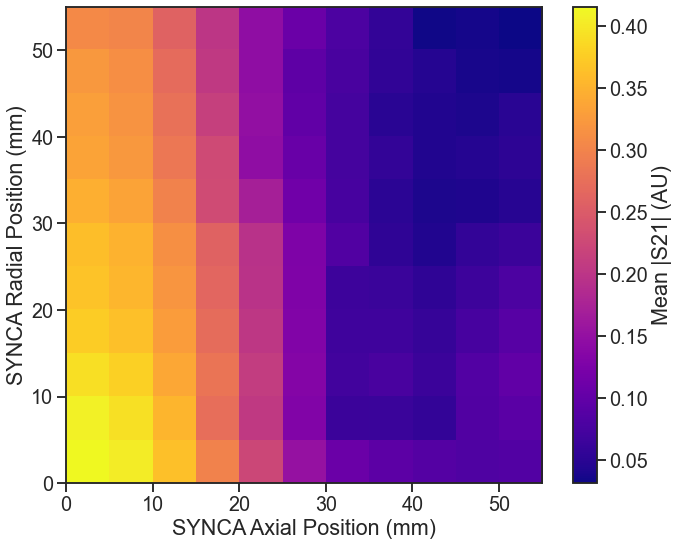

In [128]:
sns.set_theme(style='ticks', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)


img = ax.imshow(
    np.flip(max_data.mean(axis=-1), axis=0),
    cmap = 'plasma',
    extent=(0, 55, 0, 55)
    
)
fig.colorbar(img, label='Mean |S21| (AU)')
ax.set_ylabel('SYNCA Radial Position (mm)')
ax.set_xlabel('SYNCA Axial Position (mm)')

plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_beamforming_map', dpi=128)

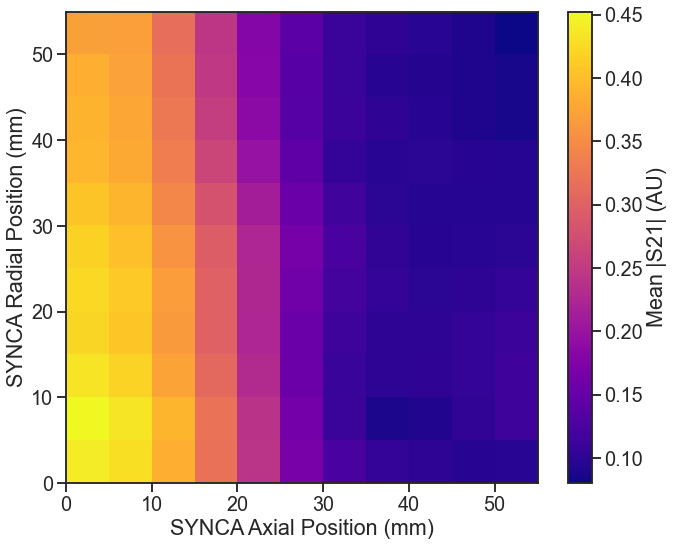

In [160]:
sns.set_theme(style='ticks', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)


img = ax.imshow(
    np.flip(total_power.mean(axis=-1), axis=0),
    cmap = 'plasma',
    extent=(0, 55, 0, 55)
)
fig.colorbar(img, label='Mean |S21| (AU)')
ax.set_ylabel('SYNCA Radial Position (mm)')
ax.set_xlabel('SYNCA Axial Position (mm)')

plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_total_power_map', dpi=128)

# mean total power

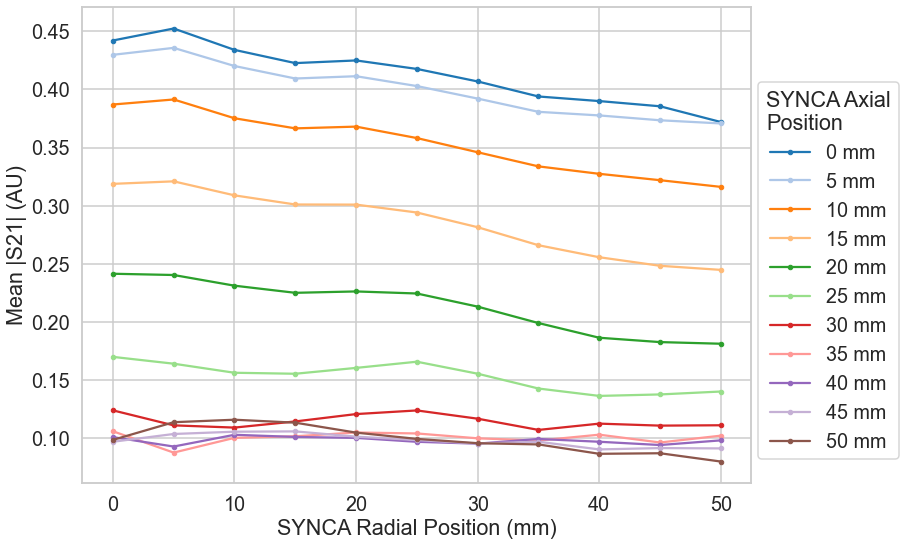

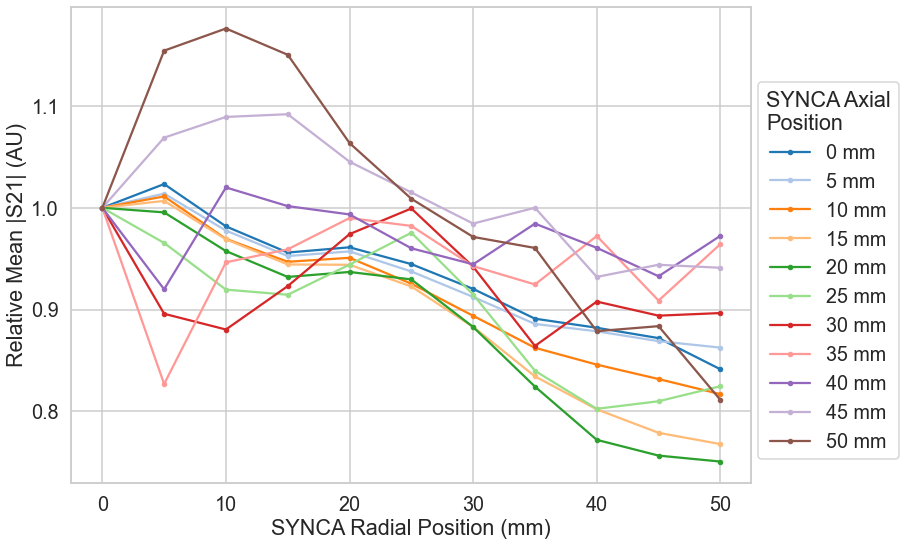

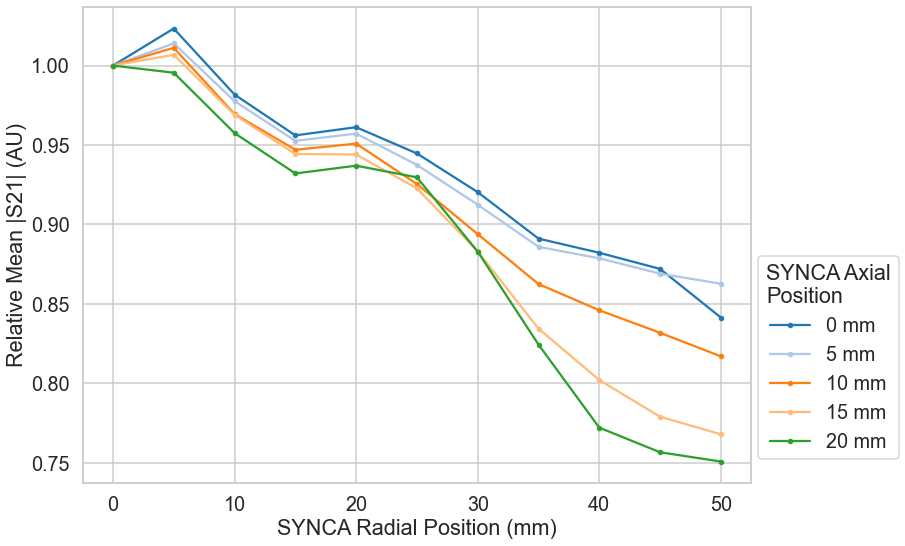

In [168]:
total_power_mean = total_power.mean(axis=-1)
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab20', n_colors=11)

for i in range(11):
    ax.plot(np.arange(0, 55, 5)* 1, total_power_mean[:, i] / 1, '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Mean |S21| (AU)')
#ax.set_ylim(0.8, 1.1)

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_total_power_curves')

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

for i in range(11):
    ax.plot(np.arange(0, 55, 5)* 1, total_power_mean[:, i] / total_power_mean[0, i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Relative Mean |S21| (AU)')
#ax.set_ylim(0.8, 1.1)

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_total_power_curves_relative')

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

for i in range(5):
    ax.plot(np.arange(0, 55, 5)* 1, total_power_mean[:, i] / total_power_mean[0, i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Relative Mean |S21| (AU)')
#ax.set_ylim(0.8, 1.1)

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_total_power_curves_relative_restricted')

# mean beamformed power

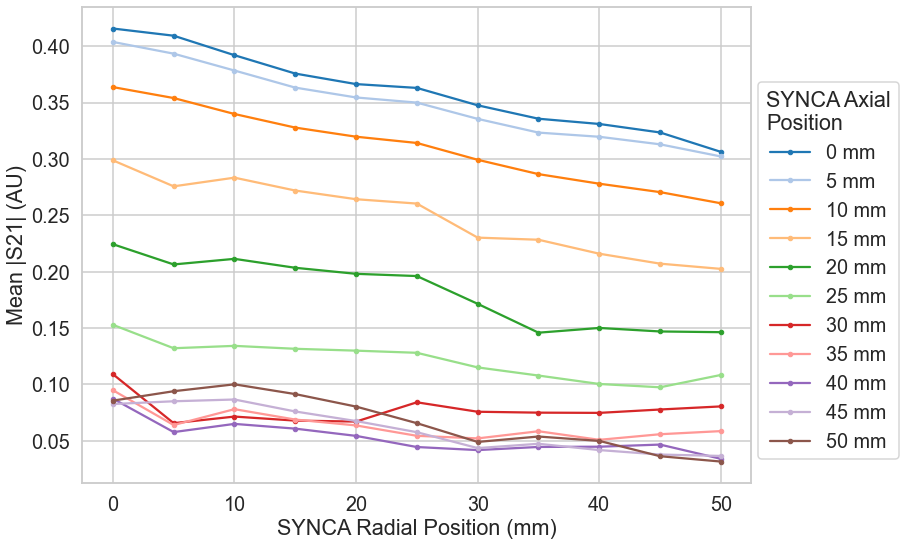

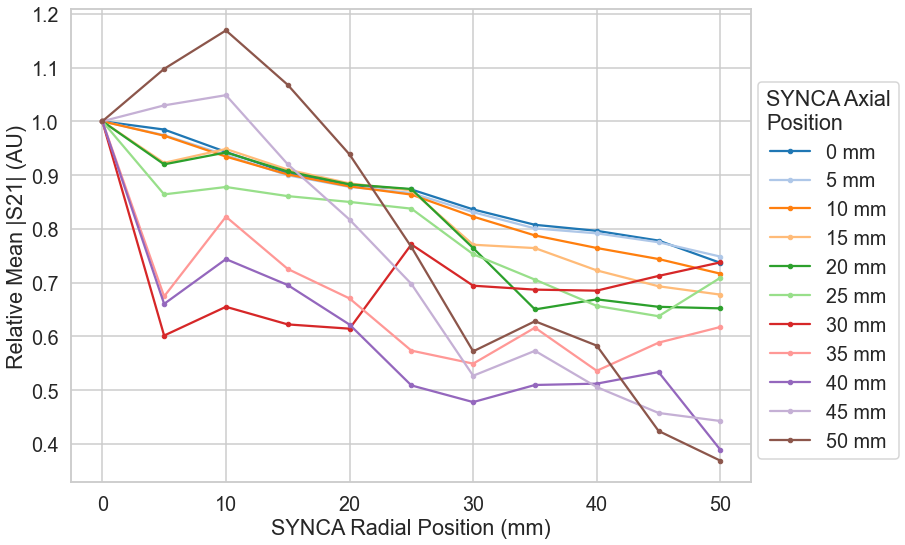

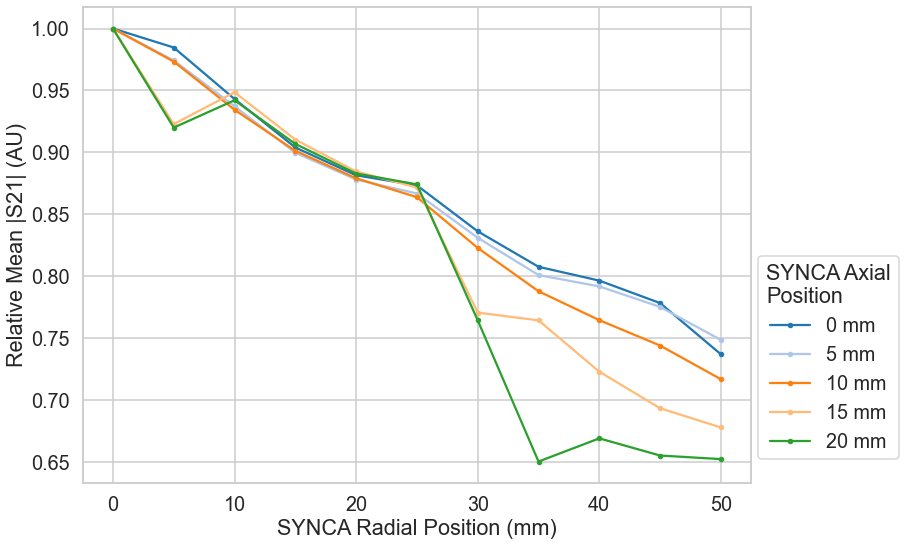

In [170]:
max_data_mean = max_data.mean(axis=-1)
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab20', n_colors=11)

for i in range(max_data_mean.shape[1]):
    ax.plot(np.arange(0, 55, 5)* 1, max_data_mean[:, i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Mean |S21| (AU)')

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_beamformed_power_curves')

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab20', n_colors=11)

for i in range(max_data_mean.shape[1]):
    ax.plot(np.arange(0, 55, 5)* 1, max_data_mean[:, i]/max_data_mean[0,i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Relative Mean |S21| (AU)')

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_beamformed_power_curves_relative')

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab20', n_colors=11)

for i in range(5):
    ax.plot(np.arange(0, 55, 5)* 1, max_data_mean[:, i]/max_data_mean[0,i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Relative Mean |S21| (AU)')

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_beamformed_power_curves_relative_restricted')

# compare total to beamformed power

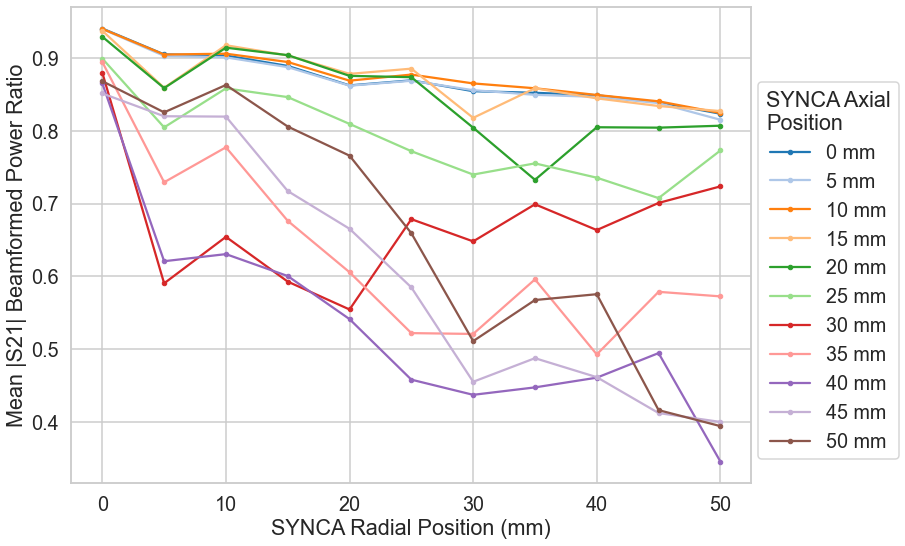

In [174]:
bf_power_ratio = max_data_mean / total_power_mean

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab20', n_colors=11)

for i in range(max_data_mean.shape[1]):
    ax.plot(np.arange(0, 55, 5)* 1, bf_power_ratio[:, i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Mean |S21| Beamformed Power Ratio')

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_jugaad_mean_beamformed_power_ratio_curves')

# Axial Sweeps

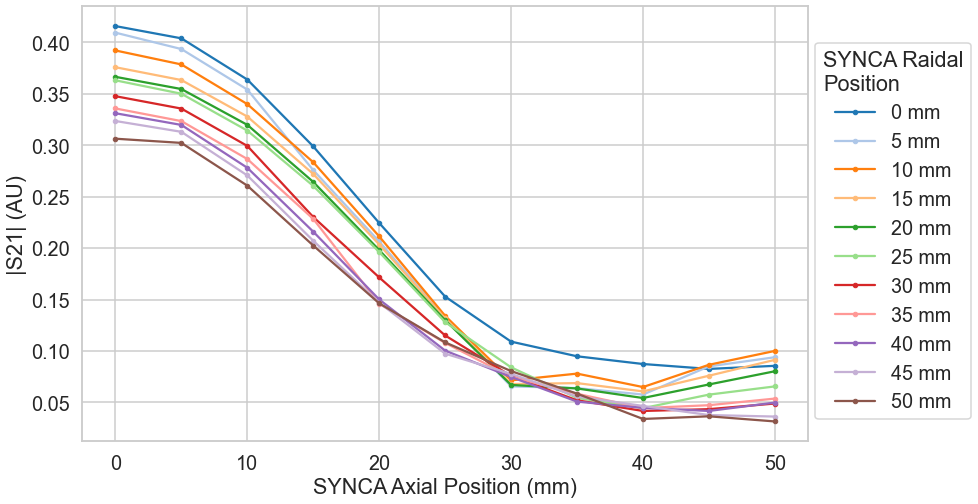

In [58]:
max_data_mean = max_data.mean(axis=-1)
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('tab20', n_colors=11)

for i in range(max_data_mean.shape[0]):
    ax.plot(np.arange(0, 55, 5)* 1, max_data_mean[i, :], '.-', color=clist[i], label=f'{5*i} mm')
    
ax.set_xlabel('SYNCA Axial Position (mm)')
ax.set_ylabel(r'|S21| (AU)')
ax.legend(loc=(1.01, 0.05), title='SYNCA Raidal'+'\n'+'Position')

# CRESAna Beamforming

In [3]:
file_repository = Path.home()/'iCloud'/'jugaad_data'/'beamforming'
cresana_beamforming = np.load(file_repository/'cresana_beamforming_amplitude.npy')
cresana_power = np.load(file_repository/'cresana_perfect_phase_amplitude.npy')

In [4]:
print(cresana_beamforming.shape)
print(cresana_power.shape)

(46, 31)
(46, 31)


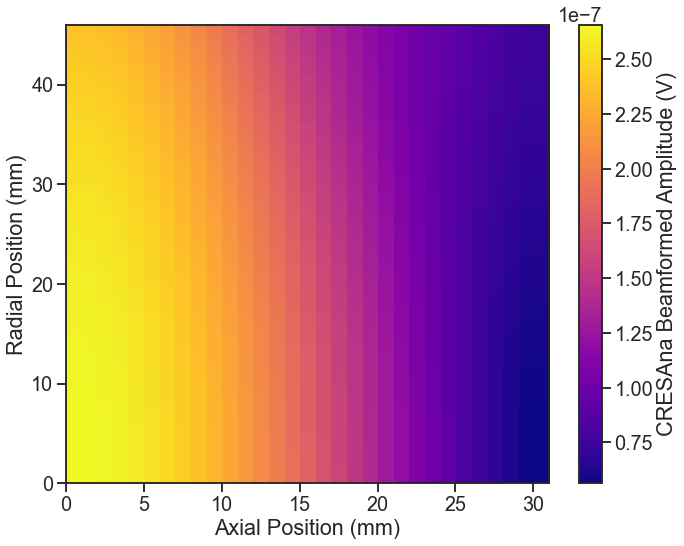

In [11]:
sns.set_theme(style='ticks', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

img = ax.imshow(
    np.flip(cresana_beamforming, axis=0),
    cmap='plasma', 
    aspect='auto',
    extent = (0, 31, 0, 46)
)
cbar = fig.colorbar(img, label='CRESAna Beamformed Amplitude (V)')
ax.set_xlabel('Axial Position (mm)')
ax.set_ylabel('Radial Position (mm)')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_beamformed_power_map', dpi=128)

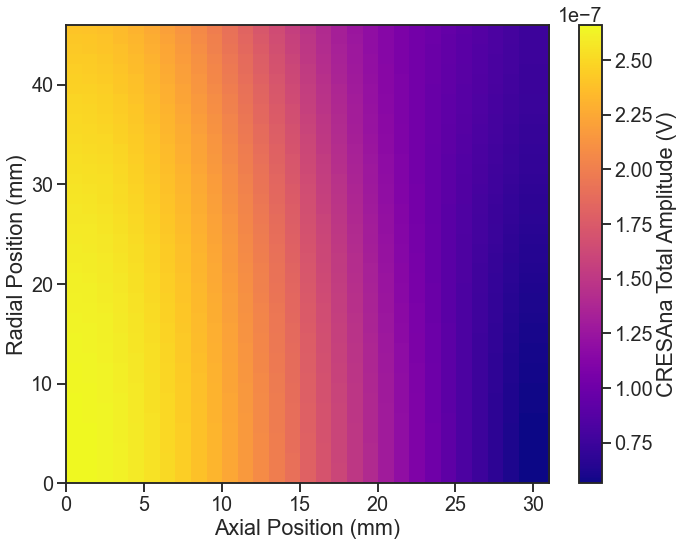

In [12]:
sns.set_theme(style='ticks', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

img = ax.imshow(
    np.flip(cresana_power, axis=0),
    cmap='plasma', 
    aspect='auto',
    extent = (0, 31, 0, 46)
)
cbar = fig.colorbar(img, label='CRESAna Total Amplitude (V)')
ax.set_xlabel('Axial Position (mm)')
ax.set_ylabel('Radial Position (mm)')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_total_power_map', dpi=128)

# mean total power

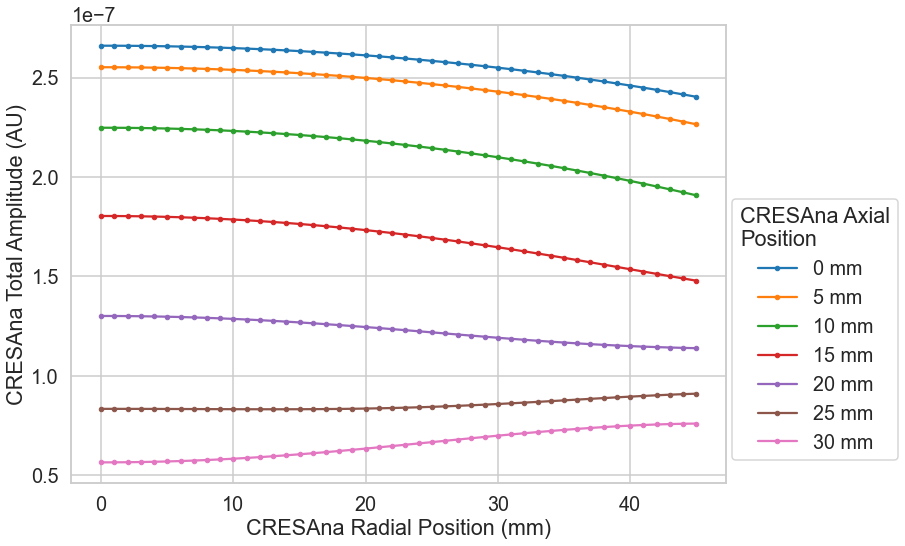

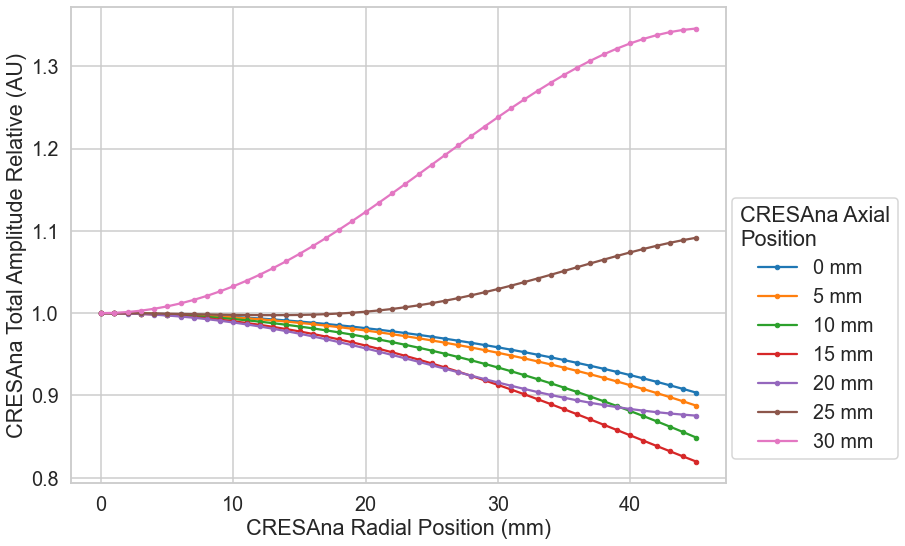

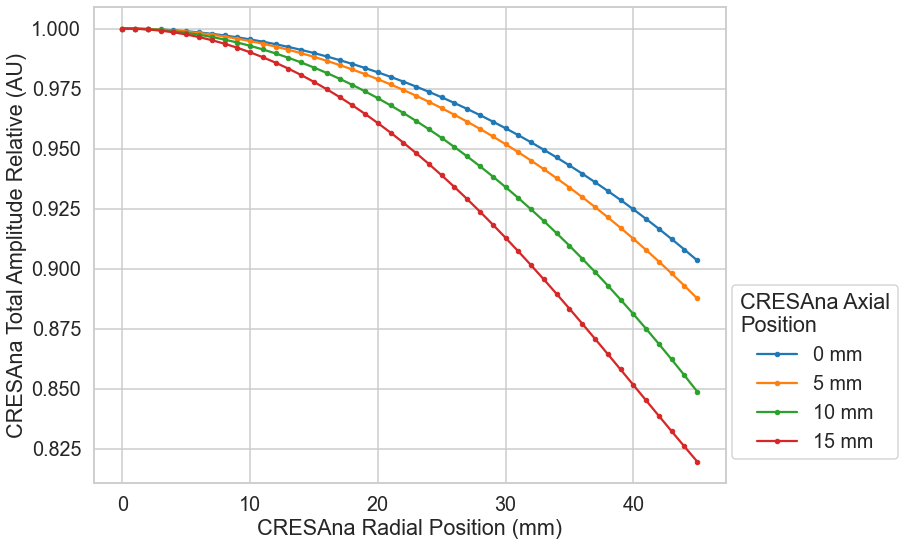

In [13]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

for i, n in enumerate(np.arange(0, 35, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_power[:, n] / 1, '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Total Amplitude (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_total_power_curves', dpi=128)

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=31)

for i, n in enumerate(np.arange(0, 35, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_power[:, n] / cresana_power[0, n], '.-', color=clist[i], label=f'{n} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Total Amplitude Relative (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_total_power_curves_relative', dpi=128)

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=31)

for i, n in enumerate(np.arange(0, 20, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_power[:, n] / cresana_power[0, n], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Total Amplitude Relative (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_total_power_curves_relative_restricted', dpi=128)

# mean beamformed power

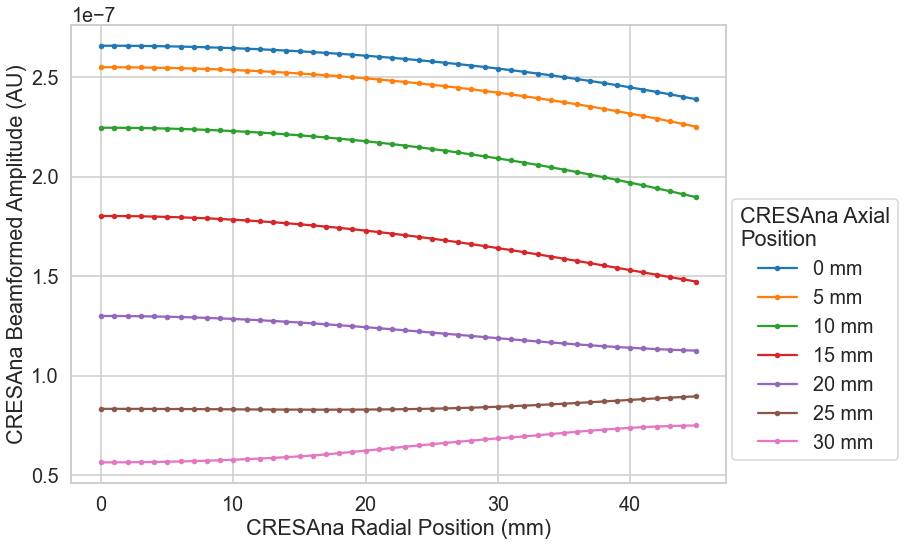

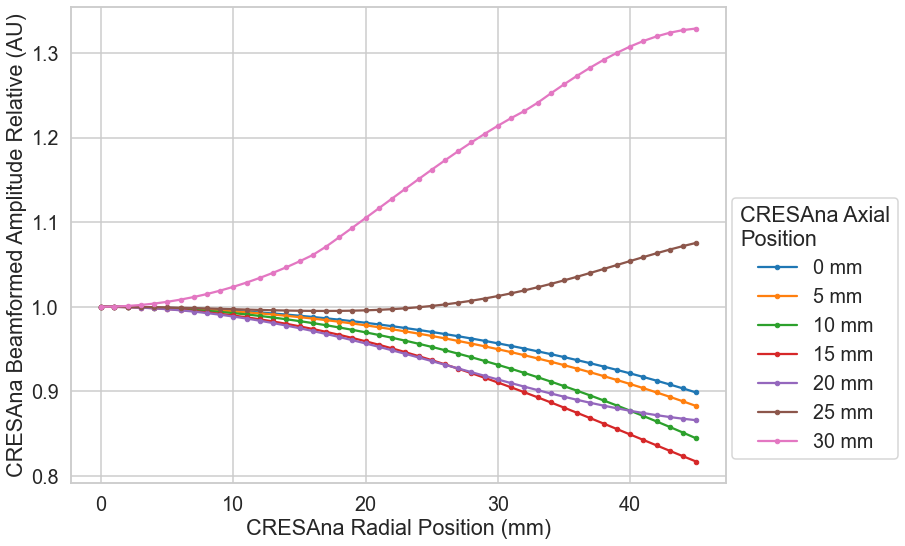

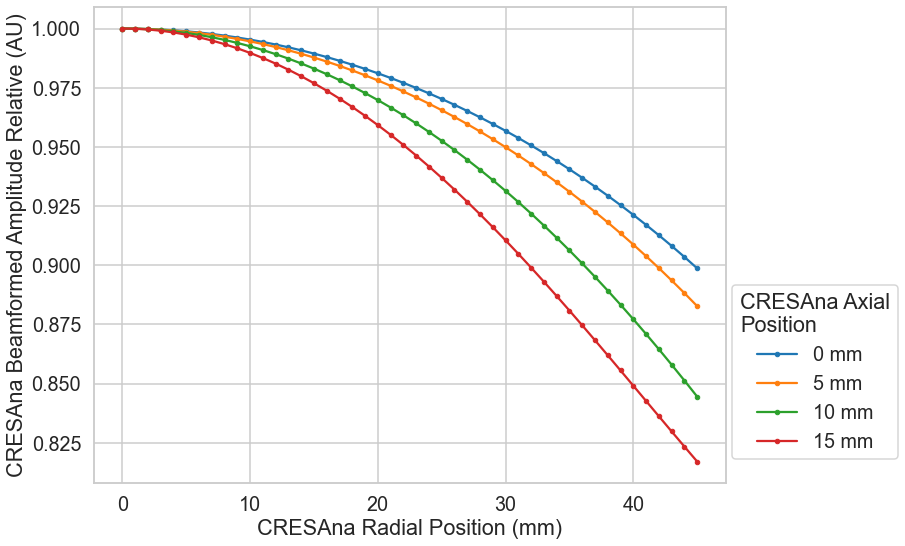

In [14]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

for i, n in enumerate(np.arange(0, 35, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_beamforming[:, n] / 1, '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Beamformed Amplitude (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_beamformed_power_curves', dpi=128)

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

for i, n in enumerate(np.arange(0, 35, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_beamforming[:, n] / cresana_beamforming[0, n], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Beamformed Amplitude Relative (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_beamformed_power_curves_relative', dpi=128)

##########

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

for i, n in enumerate(np.arange(0, 20, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_beamforming[:, n] / cresana_beamforming[0, n], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Beamformed Amplitude Relative (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_beamformed_power_curves_relative_restricted', dpi=128)

# Compare beamformed to total power for CRESAna

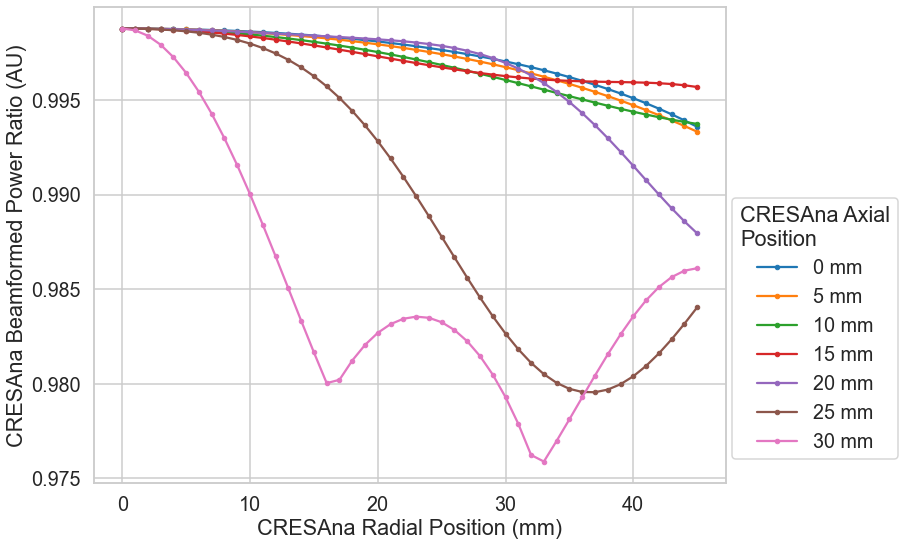

In [15]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

for i, n in enumerate(np.arange(0, 35, 5)):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_beamforming[:, n] / cresana_power[:, n], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'CRESAna Beamformed Power Ratio (AU)')
ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')
#ax.set_ylim(0.84, 0.87)
plt.tight_layout(pad=1.02)
plt.savefig(Path.home()/'iCloud'/'plots'/'221213_cresana_mean_beamformed_power_ratio_curves', dpi=128)


# Compare JUGAAD to CRESAna

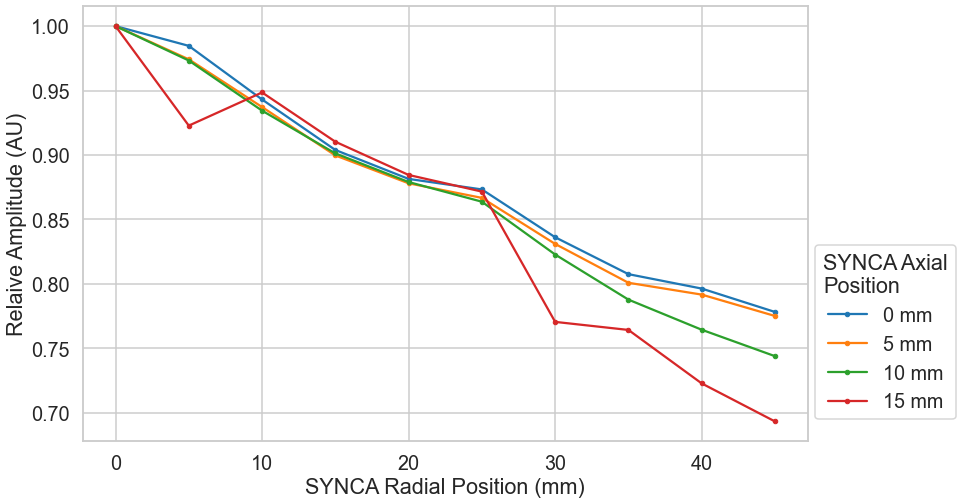

In [80]:
max_data_mean = max_data.mean(axis=-1)
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

for i in range(4):
    ax.plot(np.arange(0, 50, 5)*1, max_data_mean[0:-1, i] / max_data_mean[0, i], '.-', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('SYNCA Radial Position (mm)')
ax.set_ylabel(r'Relaive Amplitude (AU)')

ax.legend(loc=(1.01, 0.05), title='SYNCA Axial'+'\n'+'Position')

    

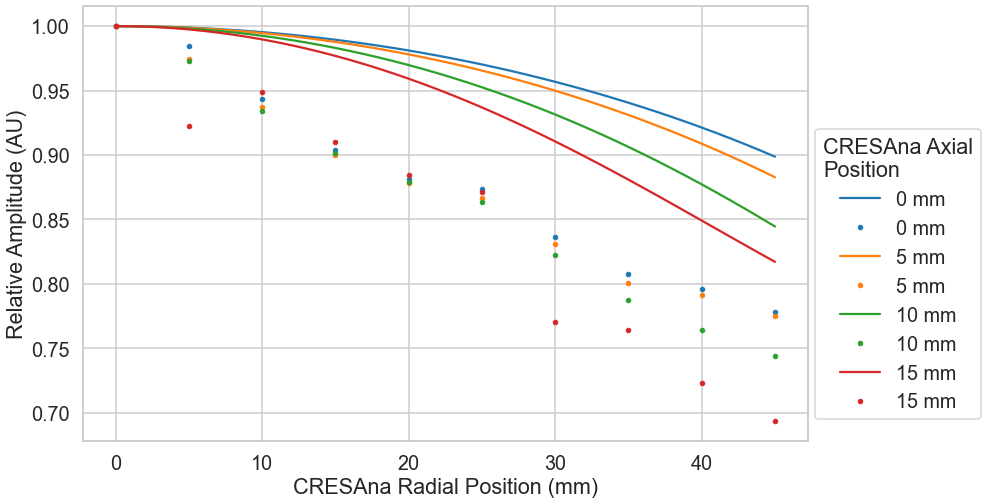

In [84]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

cresana_beamforming_inds = [0, 5, 10, 15]

for i, n in enumerate(cresana_beamforming_inds):
    ax.plot(np.arange(0, 46, 1)* 1, cresana_beamforming[:, n] / cresana_beamforming[0, n], '-', color=clist[i], label=f'{n} mm')
    ax.plot(np.arange(0, 50, 5)*1, max_data_mean[0:-1, i] / max_data_mean[0, i], '.', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'Relative Amplitude (AU)')

ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')

    

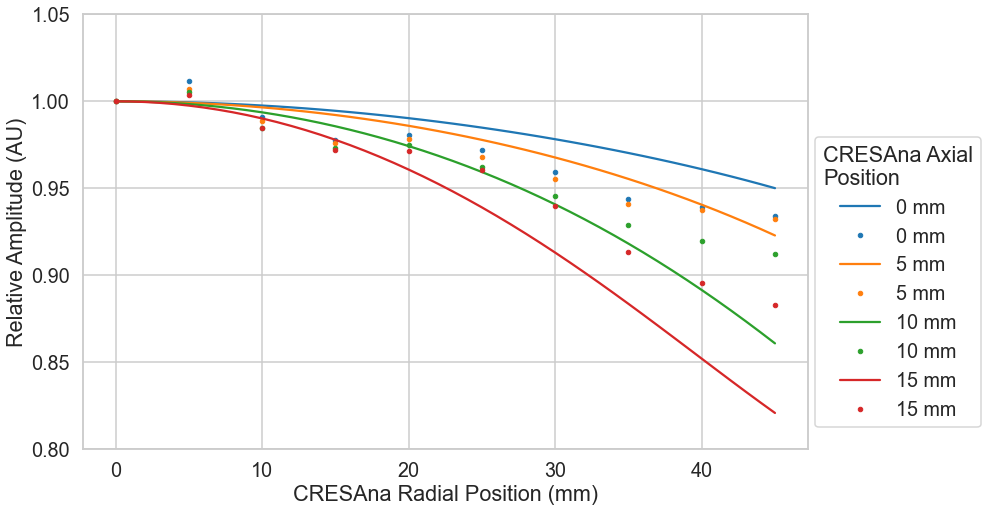

In [146]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('tab10', n_colors=11)

cresana_beamforming_inds = [0, 5, 10, 15]

for i, n in enumerate(cresana_beamforming_inds):
    ax.plot(np.arange(0, 46, 1)* 1, np.sqrt(cresana_power[:, n]) / np.sqrt(cresana_power[0, n]), '-', color=clist[i], label=f'{n} mm')
    ax.plot(np.arange(0, 50, 5)* 1, total_power_mean[0:-1, i] / total_power_mean[0, i], '.', color=clist[i], label=f'{5*i} mm')

ax.set_xlabel('CRESAna Radial Position (mm)')
ax.set_ylabel(r'Relative Amplitude (AU)')

ax.set_ylim(0.8, 1.05)

ax.legend(loc=(1.01, 0.05), title='CRESAna Axial'+'\n'+'Position')

    